In [10]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders


In [11]:
NamePositionY = 834
uidpos=(1703,1336)

EventName = './TechEdge (Apptitude)/'
year='2023'
eventid='1'
CertificateFormat = './Golden Elegant Certificate of Appreciation.jpg'

sender_email = "aarohan803@outlook.com"
smtp_username = "aarohan803@outlook.com"
smtp_password = "xyz"

subject = "TechEdge Participation Certificate"
body = "We are thrilled to extend our heartfelt congratulations to you for your active participation in the TechEdge (Aptitude) event. Your dedication and enthusiasm contributed significantly to the success of our program, and we are grateful for your involvement.\n\nIt is with great pleasure that we present you with this official TechEdge (Aptitude) Event Participation Certificate. Your commitment to enhancing your aptitude skills is commendable, and we hope that this certificate serves as a testament to your hard work and dedication."

In [12]:
try:
    os.makedirs(EventName)
except: 
    print ('Already Exist')

Already Exist


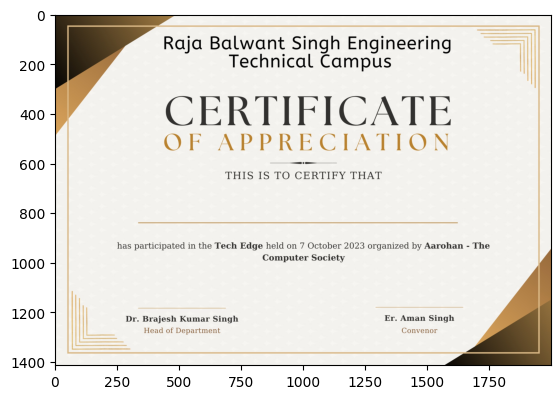

In [13]:
certi=cv2.imread(CertificateFormat)
certiRGB=cv2.cvtColor(certi, cv2.COLOR_BGR2RGB)
plt.imshow(certiRGB)
plt.show()

In [14]:
def WriteCerti(text,Year,Branch,uid):
    font = cv2.FONT_HERSHEY_COMPLEX
    font_scale = 3
    font_color = (0, 0, 0)
    font_thickness = 2
    Detail='of '+Year+' from Branch '+Branch
    DetailScale= font_scale/2
    uidsize=.8

    certi=cv2.imread(CertificateFormat)


    (text_width, _), _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    (Detail_width, _), _ = cv2.getTextSize(Detail, font, DetailScale, font_thickness)
    x = (certi.shape[1] - text_width) // 2
    dx= (certi.shape[1] - Detail_width) // 2
    overlay = certi
    cv2.putText(overlay, text, (x, NamePositionY), font, font_scale, font_color, font_thickness, lineType=cv2.LINE_AA)
    cv2.putText(overlay, Detail, (dx, NamePositionY+50), font, DetailScale, font_color, font_thickness, lineType=cv2.LINE_AA)
    cv2.putText(overlay, uid, uidpos, font, uidsize, font_color, font_thickness, lineType=cv2.LINE_AA)
    alpha = 0.7
    cv2.addWeighted(overlay, alpha, certi, 1 - alpha, 0, certi)
    output_image_path = EventName+text+'.jpg'
    cv2.imwrite(output_image_path, certi)
    return output_image_path

In [15]:
df=pd.read_excel('./XLS/TechEdge.xlsx')

In [16]:
smtp_server = "smtp-mail.outlook.com"
smtp_port = 587


In [17]:
df.values[0]

array([1, nan, 'Samriddh Deva', 'samridhdeva7@gmail.com', 9557989322,
       '4th Year', 'CSE'], dtype=object)

In [18]:
for i in df.values:
    uid='UID: '+year+eventid+str(i[0])
    name=i[2]
    Year=i[5]
    Branch=i[6]
    image_path = WriteCerti(name,str(Year),Branch,uid) 
    receiver_email = i[3]
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    message.attach(MIMEText('Hey, '+name+'\n\n'+body, "plain"))

    with open(image_path, "rb") as image_file:
        image_data = MIMEImage(image_file.read(), name="image.jpg")
        message.attach(image_data)
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(smtp_username, smtp_password)

        server.sendmail(sender_email, receiver_email, message.as_string())
        print("Email sent successfully!")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

server.quit()

Email sent successfully!
Email sent successfully!


(221, b'2.0.0 Service closing transmission channel')